<a href="https://colab.research.google.com/github/kiran2424/hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

The hotel industry is one of the most important components of the wider service industry, catering for customers who require overnight accommodation. The primary purpose of hotels is to provide travelers with shelter, food, refreshment, and similar services.

Data analytics in the hotel industry can help hoteliers to develop a strategy for managing revenue by using the available data. 

Lets analyse the data set and perform various comparison studies & calculations to draw out conclusions through the information.

We will analyse the data by the following steps:

  A) **Import Libraries**

  B) **Importing Data**

  C) **Data Cleaning**

  D) **Data Analysis and Data Visualisation**

  E) **Conclusion**

  F) **Summation**



Now before we start to analyze the data lets built some questions so that we can come to an conclusion.

1. Which type of hotels that are booked?
2. Which type of customers is booking hotels?
3. From which medium the maximum booking had happened?
4. Find the rate of cancellation of hotels?
5. Find the month and year that has maximum booking? Compare it with hotel type and hotel canceled.
6. Find the top 10 countries that had maximum bookings?
7. Find the relationship between room change and cancellation?
8. What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?
9. What Kind of People Book the Most Hotels?
10. For how long do people stay in the hotel?
11. Percentage of Repeated Guests in hotels
12. Analyse avg ADR for given statements
      - Avg ADR for each year
      - Avg ADR for resort and hotel
      - Avg ADR for each country
      - Avg ADR of top 10 country who has highest number of bookings


# **A) Import Libraries**

In [ ]:
# Lets import the neccessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# **B) Importing Data**

In [ ]:
# Importing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone P1 - EDA/Hotel_Bookings.csv')

In [ ]:
#Information of loaded data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Last two rows of data
df_data.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,2017-09-07


# **C) Data Cleaning**

In [ ]:
# Missing data
total = df_data.isnull().sum().sort_values(ascending=False)
percent = ((df_data.isnull().sum()/df_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
is_canceled,0,0.000000
market_segment,0,0.000000


As in above result, it is seen that four columns has null values i.e. country,agent,children and company. 

Company has 94% null values followed by agent having 13% null values so percentage of missing values ih high. Here we can drop company and agent column as we will not be using these columns in the coding.

The percentage of country & children column is low and these two columns are important in our coding so we will be replacing the missing values.

In country column we can put 'no value' in empty places as country column is of sting type. And in children columnn we can just fill in with mean of the column.


In [ ]:
#Shape of original data
df_data.shape

(119390, 32)

In [ ]:
# Replacing country's null value with string
df_data['country'].fillna('no value',inplace=True)

In [ ]:
#Shape of country column
df_data['country'].shape

(119390,)

In [ ]:
#Replacing children column with mean
df_data['children'].fillna(round(df_data.children.mean()), inplace=True)

In [ ]:
#Shape of children column
df_data['children'].shape

(119390,)

In [ ]:
# Dropping columns
df_data.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
#Shape of data after dealing with null values
df_data.shape

(119390, 30)

The data has been cleaned.

# **D) Data Analysis and Data Visualisation**

# **1. Which type of hotels are booked?**

In [ ]:
df_data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Now lets visualize it graphically

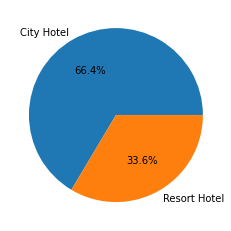

In [ ]:
hotel_type=df_data['hotel'].value_counts()
plt.pie(hotel_type,labels=['City Hotel','Resort Hotel'],autopct='%1.1f%%')
plt.show()

Here as we can see city hotels are more booked (66.4%) in compare to resort hotels (33.6%).

# **2. Which type of customers is booking hotels?**



In [ ]:
customer_type_counts = df_data['customer_type'].value_counts()
customer_type_percentage = 100*(df_data['customer_type'].value_counts()/len(df_data['customer_type']))
pd.concat([customer_type_counts,customer_type_percentage], axis=1,keys=['Customer_type', 'Customer_type_percentage'])

,Customer_type,Customer_type_percentage
Transient,89613,75.059050
Transient-Party,25124,21.043638
Contract,4076,3.414021
Group,577,0.483290


So the maximum customer type is Transient (75%) which means these are the customers who are living for short period of time

# **3. From which medium the maximum booking had happened?**

In [ ]:
market_segment_counts=df_data['market_segment'].value_counts()
market_segment_percentage = 100*(df_data['market_segment'].value_counts()/len(df_data['market_segment']))
pd.concat([market_segment_counts,market_segment_percentage], axis=1,keys=['market_segment', 'market_segment_percentage'])

,market_segment,market_segment_percentage
Online TA,56477,47.304632
Offline TA/TO,24219,20.285619
Groups,19811,16.593517
Direct,12606,10.558673
Corporate,5295,4.435045
Complementary,743,0.622330
Aviation,237,0.198509
Undefined,2,0.001675


47% people has booked hotel online

# **4. Find the rate of cancellation of hotels?**



From here we will compare each calculation with canceled column. 

The notations are:

0: not canceled (booked)

1: is canceled

In [ ]:
# total counts of canceled vs booked
hotel_canceled = df_data['is_canceled'].value_counts()
hotel_canceled

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
# total percentage of canceled vs booked
hotel_canceled_percentage = 100*(df_data['is_canceled'].value_counts()/len(df_data['is_canceled']))
hotel_canceled_percentage

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

So 37% of total booking got canceled

Now lets see numbers of cancellation w.r.t hotel types

In [ ]:
hotel_type_cancellation=df_data.groupby(['hotel'])['is_canceled'].value_counts()
hotel_type_cancellation

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

In [ ]:
# City hotel canceled percentage
round((hotel_type_cancellation[1])/(hotel_type_cancellation[0]+ hotel_type_cancellation[1])*100)

42

In [ ]:
# Resort hotel canceled percentage
round(hotel_type_cancellation[3]/(hotel_type_cancellation[2] + hotel_type_cancellation[3])*100)

28

Lets plot above

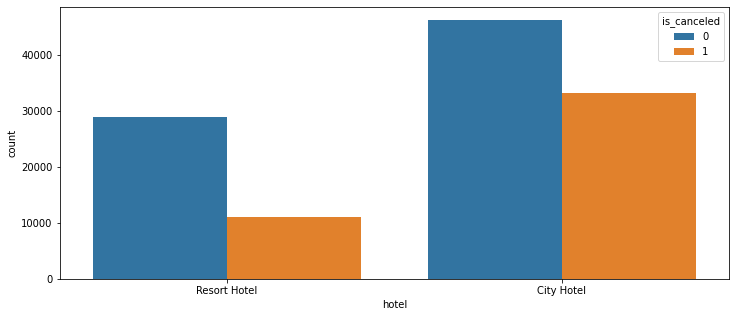

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='hotel', hue = 'is_canceled', data= df_data)
plt.show()

City hotel has maximum cancellation which is 42% and resort hotel are getting less cancelled i.e. 28% compared to city

# **5. Find the month and year that has maximum booking? Compare it with hotel type and hotel canceled.**

In [ ]:
month=df_data['arrival_date_month'].value_counts()
month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


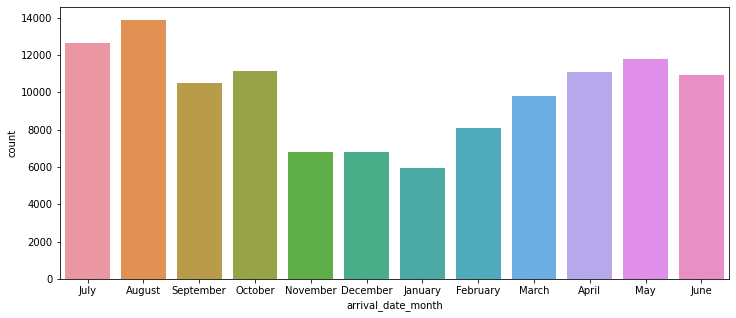

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(df_data['arrival_date_month'])
plt.show()

So August has highest number of bookings. But this include both resort and city hotels

Lets see resort and city hotels differently

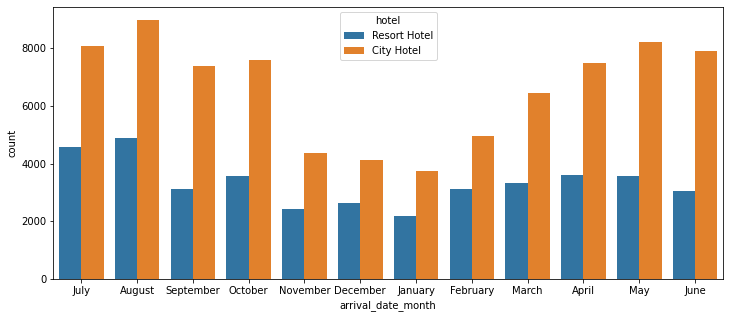

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df_data)
plt.show()

So resort and city both hotel types has highest number of bookings in August month



We should also look how much booking got canceled in each month

In [ ]:
df_data.groupby(['is_canceled'])['arrival_date_month'].value_counts()

is_canceled  arrival_date_month
0            August                8638
             July                  7919
             May                   7114
             October               6914
             March                 6645
             April                 6565
             June                  6404
             September             6392
             February              5372
             November              4672
             December              4409
             January               4122
1            August                5239
             July                  4742
             May                   4677
             June                  4535
             April                 4524
             October               4246
             September             4116
             March                 3149
             February              2696
             December              2371
             November              2122
             January               1807
Name: ar

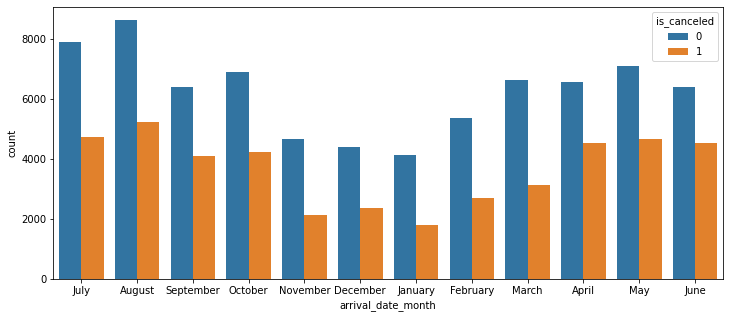

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue = 'is_canceled', data= df_data)
plt.show()

So August has max cancellations followed by july and may

No lets see which year has highest bookings

In [ ]:
year=df_data['arrival_date_year'].value_counts()
year

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

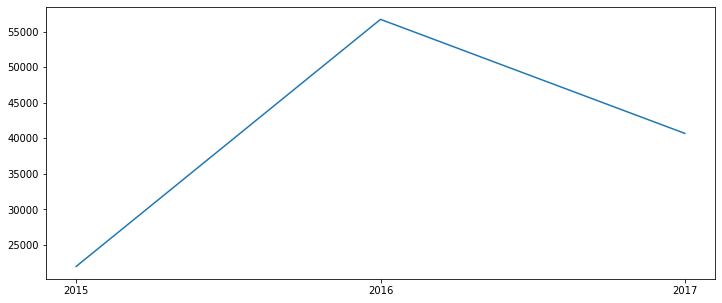

In [ ]:
x=['2015','2016','2017']
y=[year.loc[2015], year.loc[2016], year.loc[2017]]
plt.plot(x,y)
plt.show()

So booking has increased in 2016 than decreased in 2017. And max booking was in 2016 which include both resort and city hotels


Now lets see resort and city hotels differently in each year

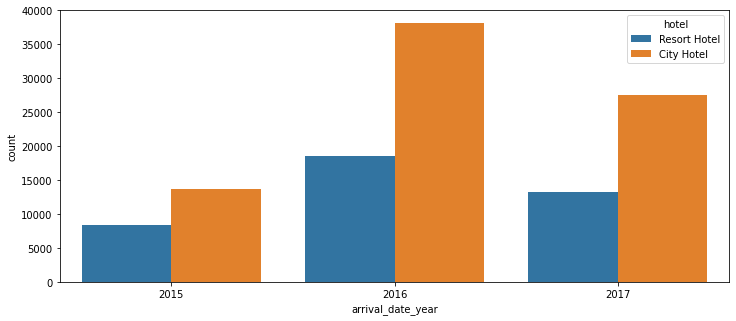

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year', hue = 'hotel', data= df_data)
plt.show()

So resort and city both hotels has highest number of bookings in 2016


Lets see which year has max cancellation

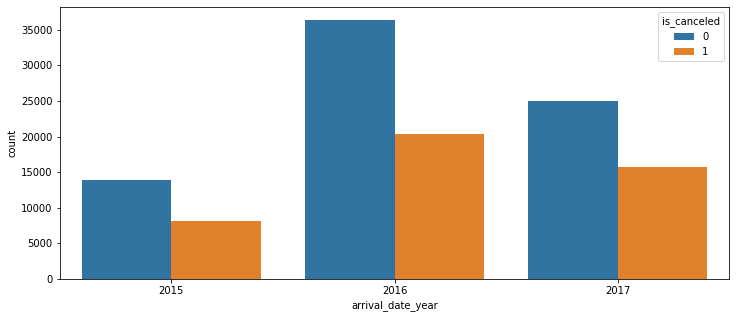

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year', hue = 'is_canceled', data = df_data)
plt.show()

In 2016 max booking was cancelled

Now lets see year wise booking of each month

In [ ]:
df_data.groupby(['arrival_date_year'])['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               September             5114
                   October               4957
                   August                3889
                   December              2920
                   July                  2776
                   November              2340
2016               October               6203
                   May                   5478
                   April                 5428
                   September             5394
                   June                  5292
                   August                5063
                   March                 4824
                   July                  4572
                   November              4454
                   February              3891
                   December              3860
                   January               2248
2017               May                   6313
                   April                 5661
                   June                  5

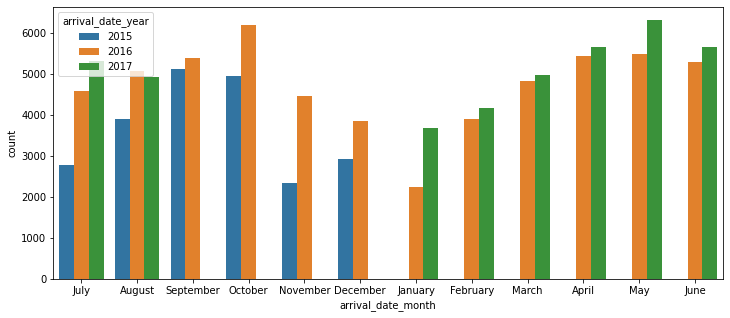

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue = 'arrival_date_year', data = df_data)
plt.show()

As we can see in above graph, we have data from July 2015 till August 2017. Earlier we have seen August is the month who has maximum booking but that was cummulative result of all three years. August is repeating in every year. 

Here in year 2015, the maximum booking was in September. In year 2016, it is October and in year 2017, it is May.

In none of the year we have got August.

So we can't say August has maximum booking in each year, it has maximum booking but in the given period of time in our data base.

If our data was from January to December or from July 2015 till June 2017 then we can get accurate number in the outcome 

# **6. Find the top 10 countries that had maximum bookings?**

In [ ]:
df_data['country'].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

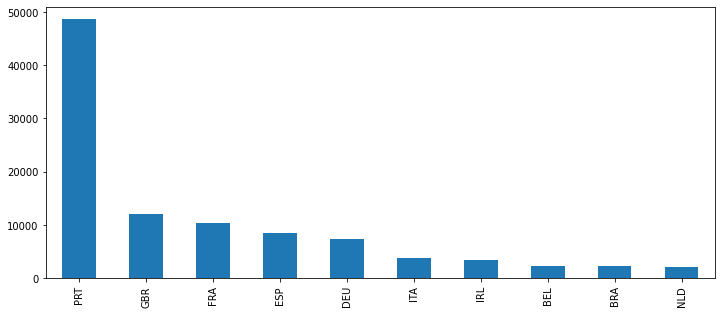

In [ ]:
df_data['country'].value_counts().head(10).plot(kind='bar')

Portugal has highest bookings followed by Germany and France

Lets compare countrywise bookings with hotel types

In [ ]:
booking_top_ten = df_data[df_data['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

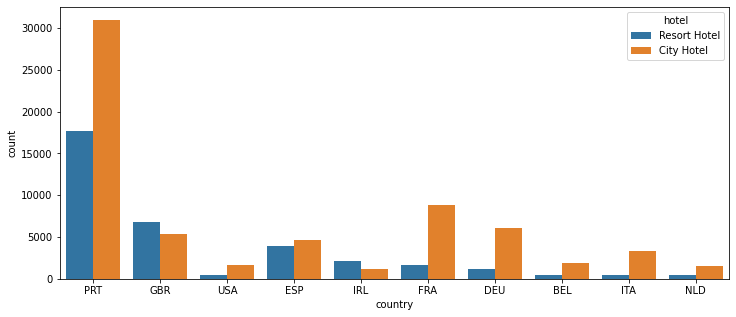

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='country', hue = 'hotel', data = top_ten)
plt.show()

Portugal has max booking in resort as well as city hotel. 

The 2nd highest booking is in Germany for both resort hotel & city hotels. 

The 3rd highest booking for resort hotel is in Spain and for city hotel is in France.

Now lets see which countries has highest cancellation

In [ ]:
countrywise_cancellation = df_data[df_data['is_canceled'] == 1]['country'].value_counts().reset_index().head(10)
countrywise_cancellation

,index,country
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


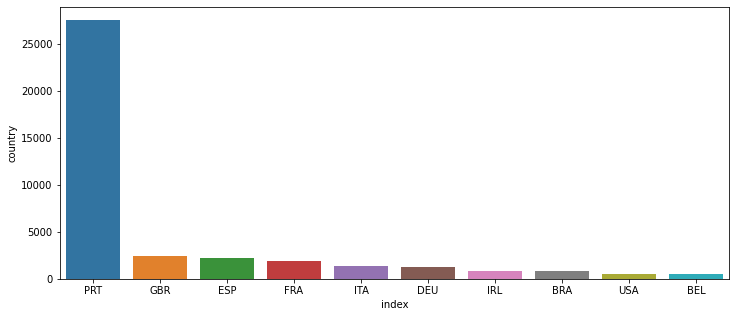

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='index', y='country', data = countrywise_cancellation)
plt.show()

Portugal has highest cancellation followed by Germany and Spain

Now lets see the actual people stayed and enjoyed their holidays

In [ ]:
actual_booking = df_data[df_data['is_canceled'] == 0]['country'].value_counts().reset_index().head(10)
actual_booking

,index,country
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


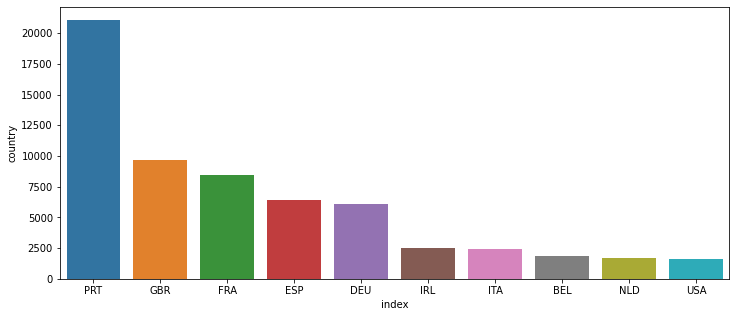

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='index', y='country', data = actual_booking)
plt.show()

So after looking at the actual booking data, USA has taken place in top 10 and BRA (Brazil) got removed from top 10.

# **7. Find the relationship between room change and cancellation?**

In [ ]:
df_data['assigned_same_room'] = df_data['reserved_room_type']==df_data['assigned_room_type']
df_data['assigned_same_room']

0          True
1          True
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: assigned_same_room, Length: 119390, dtype: bool

In [ ]:
compared_data = df_data.groupby(['assigned_same_room'])['is_canceled'].value_counts()
compared_data

assigned_same_room  is_canceled
False               0              14115
                    1                802
True                0              61051
                    1              43422
Name: is_canceled, dtype: int64

In [ ]:
round(compared_data[0,1]/compared_data[0,0]*100,1)

5.7

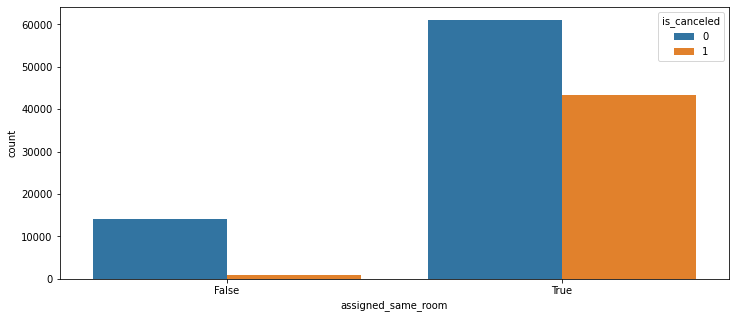

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='assigned_same_room', hue = 'is_canceled', data = df_data)
plt.show()

Customer who has not changed room type has cancellation more and 5.7% of people cancelled room after they had assigned different room from booking room.

# **8. What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

In [ ]:
df_data.groupby(['total_of_special_requests'])['hotel'].value_counts()

total_of_special_requests  hotel       
0                          City Hotel      47957
                           Resort Hotel    22361
1                          City Hotel      21420
                           Resort Hotel    11806
2                          City Hotel       8142
                           Resort Hotel     4827
3                          City Hotel       1587
                           Resort Hotel      910
4                          City Hotel        198
                           Resort Hotel      142
5                          City Hotel         26
                           Resort Hotel       14
Name: hotel, dtype: int64

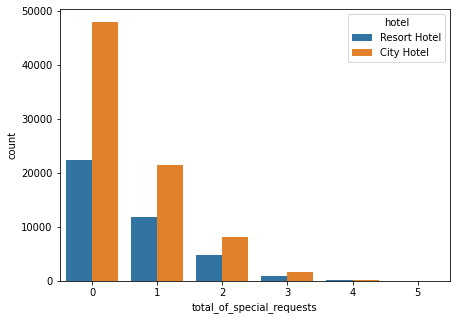

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='total_of_special_requests', hue = 'hotel', data = df_data)
plt.show()

So the probability of 0 special request is highest

# **9. What Kind of People Book the Most Hotels?**

We can divide it into three categories (We are not removing canceled data because here we want to know which type of people are doing bookings)
1. 1 adult - Single
2. 2 adults, 0 children, 0 babies - Couple
3. Minimum 1 adult, atmost 1 child or 1 baby - Family

In [ ]:
Single = df_data[(df_data.adults==1) & (df_data.children==0) & (df_data.babies==0)]
Couple = df_data[(df_data.adults==2) & (df_data.children==0) & (df_data.babies==0)]
Family = df_data[df_data.adults + df_data.children + df_data.babies > 2]
print(Single.shape[0], Couple.shape[0], Family.shape[0])

22577 81560 14578


lets see in graph

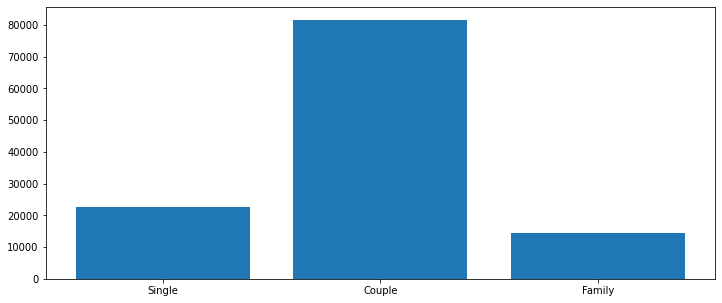

In [ ]:
Name=['Single','Couple','Family']
Total=[Single.shape[0], Couple.shape[0], Family.shape[0]]
plt.bar(Name,Total)
plt.show()

So as it is seen max booking was done by couples

Now lets see which type of people has canceled booking more

In [ ]:
Single_canceled = df_data[(df_data.is_canceled==1) & (df_data.adults==1) & (df_data.children==0) & (df_data.babies==0)]
Couple_canceled = df_data[(df_data.is_canceled==1) & (df_data.adults==2) & (df_data.children==0) & (df_data.babies==0)]
Family_canceled = df_data[(df_data.is_canceled==1) & (df_data.adults + df_data.children + df_data.babies > 2)]
print(Single_canceled.shape[0], Couple_canceled.shape[0], Family_canceled.shape[0])

6555 32424 5072


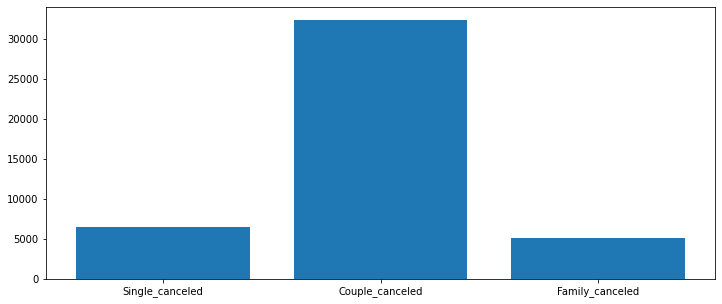

In [ ]:
Name_2=['Single_canceled','Couple_canceled','Family_canceled']
Total_2=[Single_canceled.shape[0], Couple_canceled.shape[0], Family_canceled.shape[0]]
plt.bar(Name_2,Total_2)
plt.show()

So couples has canceled booking max followed by single then family respectively

# **10. For how long people stay in hotel?**

In [ ]:
df_data['total_night_spend'] = df_data['stays_in_weekend_nights'] + df_data['stays_in_week_nights']
top_ten_values = df_data['total_night_spend'].value_counts().head(10)
top_ten_values

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
Name: total_night_spend, dtype: int64

Now lets visualize above in graph

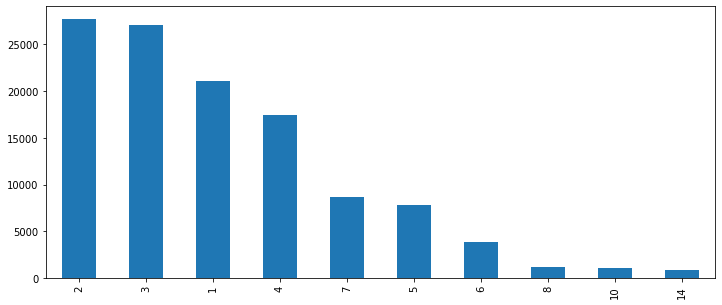

In [ ]:
top_ten_values.plot(kind='bar')

So most of people satying in hotel for 2 days follow by 3 days and 1 day.

Now lets compare resort and city hotel stays....

In [ ]:
df_data.groupby(['hotel'])['total_night_spend'].value_counts().head(50)

hotel         total_night_spend
City Hotel    2                    21426
              3                    21381
              1                    13272
              4                    12557
              5                     4997
              6                     2059
              7                     2059
              8                      385
              0                      331
              9                      213
              10                     199
              14                     100
              11                      82
              12                      65
              13                      42
              15                      42
              16                      16
              20                      13
              19                      12
              29                      11
              21                      10
              17                       8
              30                       8
              18         

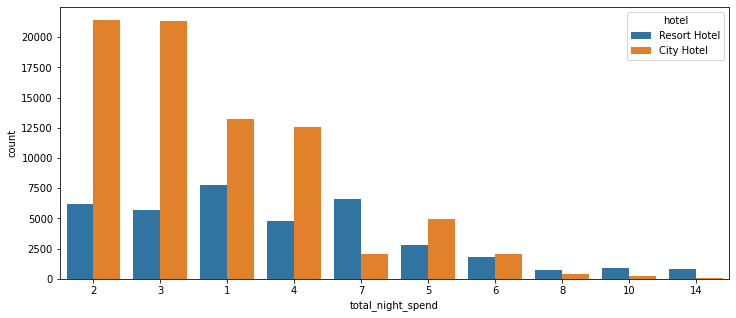

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='total_night_spend', hue = 'hotel', data = df_data, order=df_data.total_night_spend.value_counts().iloc[:10].index)
plt.show()

For city hotel most popular stay in 2,3,1 days respectively. And for resort its 1,7,2 days respectively

# **11. Percentage of Repeated Guests in hotels**

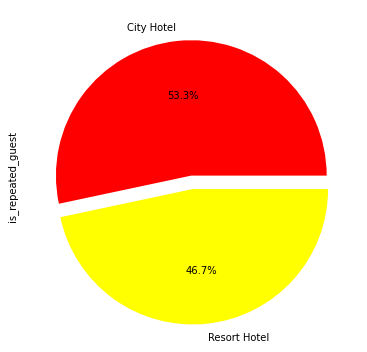

In [ ]:
dff1=df_data[df_data['is_repeated_guest']==1]
plt.figure(figsize=(10,5))
data = dff1.groupby("hotel")["is_repeated_guest"].count()
colors = ['Red','yellow']
explode=(0,0.1)
data.plot.pie(autopct="%.1f%%",colors=colors,explode=explode);

plt.tight_layout()

In city hotel 53.3% people are repeated guest while in resort the percentage is 46.7%.

# **12. Calculate avg ADR for given statements**
- Avg ADR for each year
- Avg ADR for resort and hotel
- Avg ADR for each country
- Avg ADR of top 10 country who has highest number of bookings

The definition of hotel ADR is simple: It stands for **Average Daily Rate**, and it's used to measure the average revenue that a hotel receives for each occupied guest room per day. By measuring the ADR for your property, you're able to see the average rate that comes from all occupied rooms.

Source: https://www.cvent.com/en/blog/hospitality/hotel-adr-average-daily-rate#:~:text=The%20definition%20of%20hotel%20ADR,comes%20from%20all%20occupied%20rooms.

Avg ADR for each year

In [ ]:
df_data.groupby(['arrival_date_year'])['adr'].mean()

arrival_date_year
2015     87.178515
2016     98.325863
2017    114.637950
Name: adr, dtype: float64

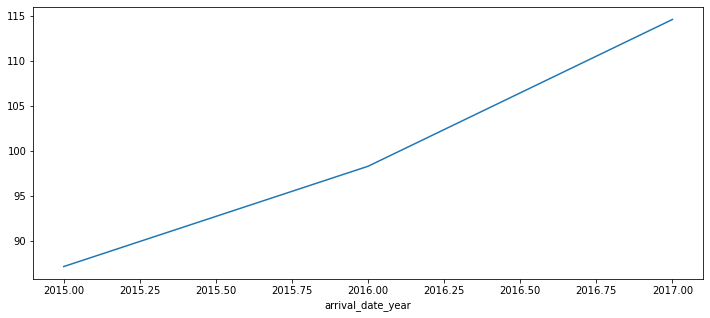

In [ ]:
df_data.groupby(['arrival_date_year'])['adr'].mean().plot()

As we can see in above graph the avg adr is gradually increasing from 2015 to 2017. So in 2017 the avg adr is max

Avg ADR for hotel and resort

In [ ]:
df_data.groupby(['hotel'])['adr'].mean()

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64

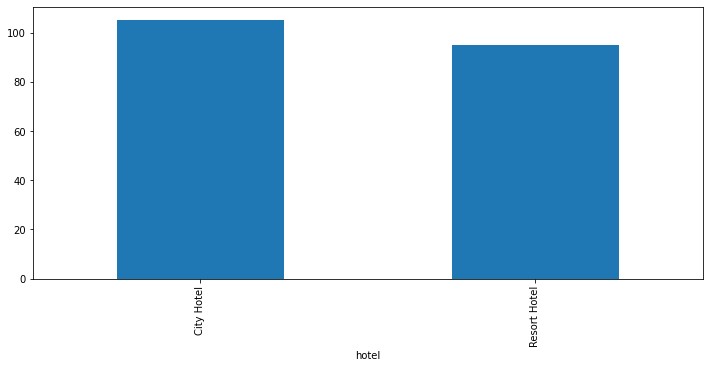

In [ ]:
df_data.groupby(['hotel'])['adr'].mean().plot(kind='bar')

Avg ADR for each country

In [ ]:
df_data.groupby(['country'])['adr'].mean().sort_values(ascending=False).head(10)

country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GEO    169.015909
COM    165.305000
FRO    155.200000
Name: adr, dtype: float64

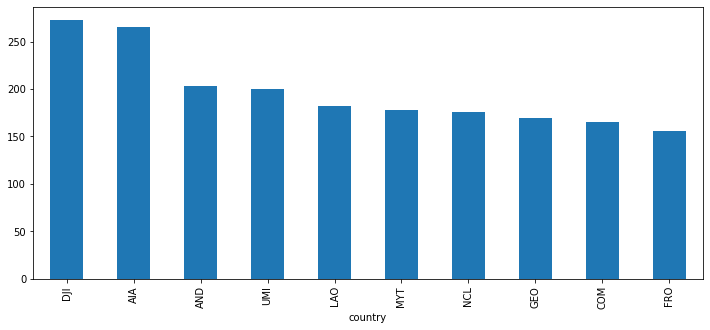

In [ ]:
df_data.groupby(['country'])['adr'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

So the highest adr is of Djibouti (DJI) . But the above 10 countries are not our top 10 coutries who has highest booking. So lets see our top 10 countries with highes booking and their adr


In [ ]:
ADR_of_top_ten=df_data.groupby('country').agg(Country_count=('country','count'),ADR=('adr','mean')).sort_values(by='Country_count',ascending=False).head(10)
ADR_of_top_ten

,Country_count,ADR
country,,
PRT,48590,92.041483
GBR,12129,96.022058
FRA,10415,109.617276
ESP,8568,116.995463
DEU,7287,104.396756
ITA,3766,113.948208
IRL,3375,98.192172
BEL,2342,113.847784
BRA,2224,111.005337


In [ ]:
ADR_of_top_ten.drop('Country_count',axis=1,inplace=True)

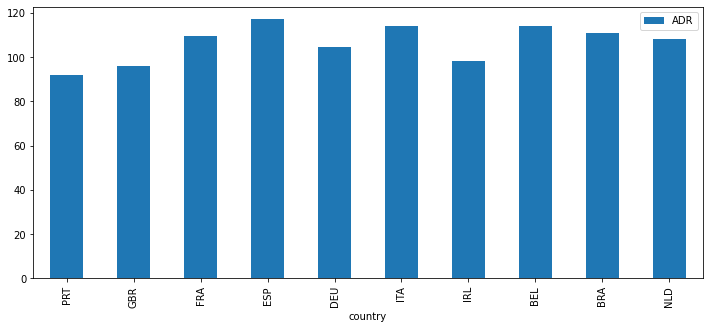

In [ ]:
ADR_of_top_ten.plot(kind='bar')

So as we know Portugal has highest booking and its adr is 92. And the highest adr from top ten countries is of Spain i.e. 116.99 ~ 117

Now the last thing is to plot the heatmap and see the co relation between the columns

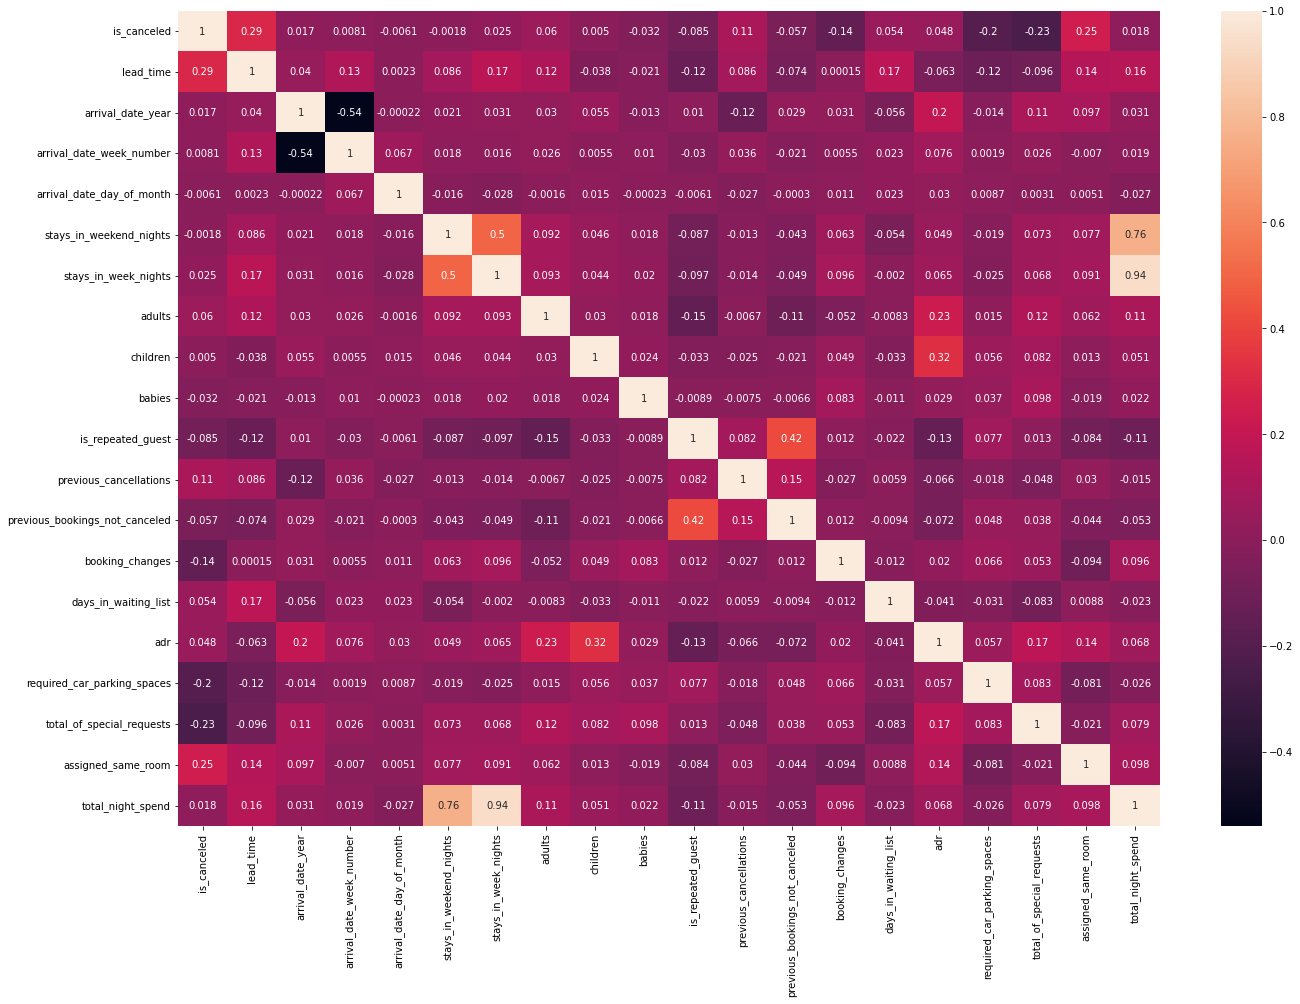

In [ ]:
plt.figure(figsize=(22,15))
sns.heatmap(df_data.corr(), annot=True)

# **E) Conclusion**

In our analysis of hotel booking we have tried different methods and visualized it by graphs.

We started with asking few question to ourself and drafted the same to get the best solution.

The first and most important step was cleaning the data. And then our analysis of data started.

Here is the conclusion of all the solution we got from our analysis:
- People are preffering city hotel more than the resort 
hotels.
- The preffered booking mode is online booking
- People preffered to stay for shorter period of time. For city hotel the popular stay is 2,3,1 days respectively and for resort hotel it is 1,7,2 days respectively.
- Couples book more hotel than single and family.
- 37% of people are cancelling their bookings (City & Resort). Resort hotel has less cancellation rate (28%) in compare to city hotels (42%)

Now our data is from July 2015 till August 2017. But we have anlysed for year and months so it will not give us acurate results.
- 2016 has highest booking in both hotel & resort 
- August has highest number of booking in both hotel & resort
- In year 2015, the maximum booking was in September. In year 2016, it was October and in year 2017, it was May
- Also, 2016 and August has highest number of cancellation
- The top three countries who has highest number of bookings are Portugal, Germany and France
- If we analyse hotel wise: Portugal has max booking in resort as well as city hotel. 2nd highest booking is in Germany. The 3rd highest booking for resort hotel is Spain and for city hotel is France.
- Portugal, Germany and Spain has maximum cancellation
- We analysed relationship between room changed and cancellation: We conclude that Customer who has not changed room type has cancellation more
- 5.7% of people cancelled room after they had assigned different room from booking room.
- The highest probability of 0 special request is highest
- The highest average ADR is for 2017 i.e. 114.63
- The average ADR for city hotel is 105.30 and for resort hotel is 94.95
- The highest average ADR is for Djibouti (DJI) country i.e. 273.
- And the highest average ADR for Portugal is 92.04


# **F) Summation**

*   Q2 & Q3 are having higher number of Bookings So hotels can avail some discount offers in Q1 and Q4 as Bookings rate is less in 
these quarters.

*  Hotels can promote their business online as most of the Bookings are coming from online portals.

*   Special discount can be given to repeated guests.

*   City Hotel can come up with special plans for long staying guests.


*   Resort Hotel can come up with special plans for short staying guests
